In [1]:
import pandas as pd
import numpy as np 

In [2]:
players = pd.read_csv('PremierLeaguePlayerStats22-23.csv')

In [3]:
players['Min'] = players['Min'].replace({',':''}, regex=True)
players['Min'] = pd.to_numeric(players['Min'])

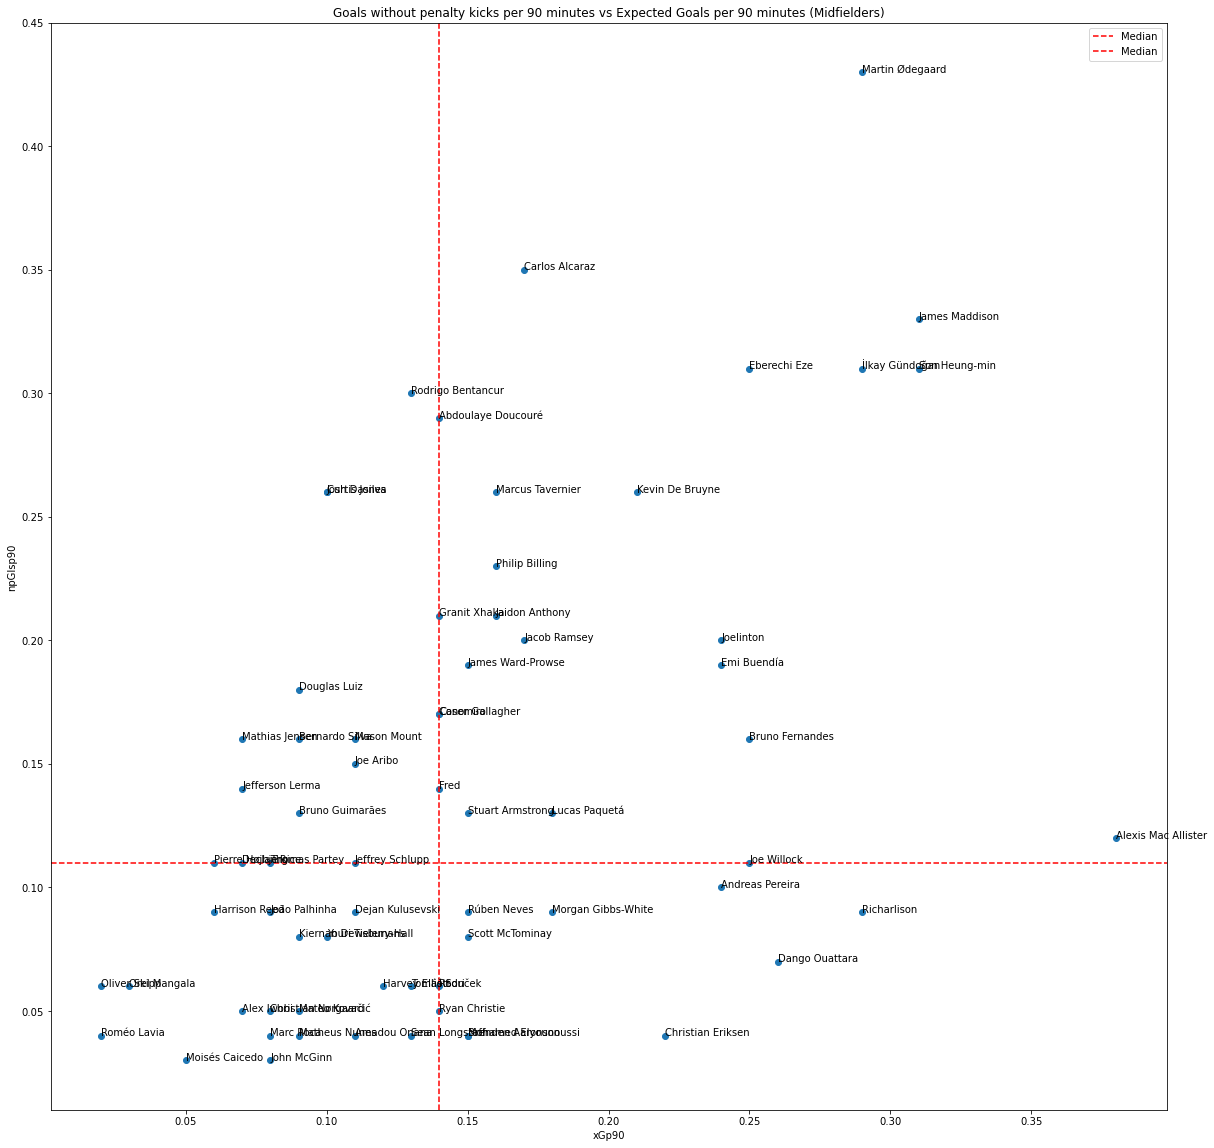

In [6]:
import matplotlib.pyplot as plt

# # Get only players whose 'Pos' column contains 'MF' and 'MP' > 1000
# midfielders = players[(players['Pos'].str.contains('MF')) & (players['Min'] > 1000)]
midfielders = players[((players['Pos'] == 'MF') | (players['Pos'] == 'MF,FW')) & (players['Min'] > 1000)]

# Filter players for whom Gls90 > 0
midfielders = midfielders[midfielders['npGlsp90'] > 0.0]

# Set the figure size
plt.figure(figsize=(20, 20))

# Calculate median values for x and y variables
x_median = midfielders['xGp90'].median()
y_median = midfielders['npGlsp90'].median()

# Plot 'Glsp90' against 'xGp90'
plt.scatter(midfielders['xGp90'], midfielders['npGlsp90'])
plt.xlabel('xGp90')
plt.ylabel('npGlsp90')
plt.title('Goals without penalty kicks per 90 minutes vs Expected Goals per 90 minutes (Midfielders)')

# Annotate each data point with the player's name
for i, player in midfielders.iterrows():
    plt.text(player['xGp90'], player['npGlsp90'], player['Player'])
    
# Add median lines
plt.axhline(y=y_median, color='r', linestyle='--', label='Median')
plt.axvline(x=x_median, color='r', linestyle='--', label='Median')
    
plt.legend()
plt.show()

In [4]:
show_names = ['Martin Ødegaard', 'Alexis Mac Allister', 'James Maddison', 'James Ward-Prowse', 'Bruno Fernandes', 
              'İlkay Gündoğan', 'Philip Billing', 'Kevin De Bruyne', 'Granit Xhaka', 'Joelinton', 'Douglas Luiz', 
              'Jacob Ramsey', 'Emi Buendía', 'Morgan Gibbs-White', 'Carlos Alcaraz', 'Pierre Højbjerg',
              'Lucas Paquetá', 'Andreas Pereira', 'Declan Rice', 'Bernardo Silva', 'Conor Gallagher', 'Curtis Jones',
              'Mason Mount', 'Youri Tielemans', 'Joe Willock', 'Kiernan Dewsbury-Hall', 'Fred',
              'Brenden Aaronson', 'Moisés Caicedo', 'Harvey Elliott', 'Christian Eriksen', 'Mateo Kovačić', 
              'Sean Longstaff', 'John McGinn', 'Scott McTominay', 'Matheus Nunes']

In [7]:
# Exclude names in 'show_names' list
player_names = midfielders['Player'].tolist()
show_badges = [name for name in player_names if name not in show_names]

print(show_badges)

['Eberechi Eze', 'Son Heung-min', 'Rúben Neves', 'Rodrigo Bentancur', 'Abdoulaye Doucouré', 'Mathias Jensen', 'Jefferson Lerma', 'Marcus Tavernier', 'Casemiro', 'Josh Dasilva', 'Bruno Guimarães', 'Jaidon Anthony', 'João Palhinha', 'Thomas Partey', 'Harrison Reed', 'Jeffrey Schlupp', 'Joe Aribo', 'Stuart Armstrong', 'Alex Iwobi', 'Dejan Kulusevski', 'Rodri', 'Tomáš Souček', 'Ryan Christie', 'Mohamed Elyounoussi', 'Roméo Lavia', 'Orel Mangala', 'Christian Nørgaard', 'Amadou Onana', 'Dango Ouattara', 'Richarlison', 'Marc Roca', 'Oliver Skipp']


In [37]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Set the figure size
plt.figure(figsize=(20, 20), dpi=600)

# Calculate median values for x and y variables
x_median = midfielders['xGp90'].median()
y_median = midfielders['npGlsp90'].median()

# Plot 'Glsp90' against 'xGp90'
plt.scatter(midfielders['xGp90'], midfielders['npGlsp90'], marker='None')
plt.xlabel('xGp90')
plt.ylabel('npGlsp90')
plt.title('Non Penalty Goals per 90 minutes vs Expected Goals per 90 minutes (Midfielders)')

# Annotate some data points with player names
for i, player in midfielders.iterrows():
    if player['Player'] in show_names:
        plt.text(player['xGp90']+0.001, player['npGlsp90']+0.007, player['Player'])

# Add club logos for selected data points
for i, player in midfielders.iterrows():
#     if player['Player'] in show_badges:
    img_path = 'club-logos/' + player['Squad'] + '.png'
    image = plt.imread(img_path)
    imagebox = OffsetImage(image, zoom = 0.075, alpha = 1)
    ab = AnnotationBbox(imagebox, (player['xGp90'], player['npGlsp90']), frameon=False)
    plt.gca().add_artist(ab)

# Add median lines
plt.axhline(y=y_median, color='r', linestyle='--', label='Median npGlsp90')
plt.axvline(x=x_median, color='r', linestyle='--', label='Median xGp90')

# Quadrants explanation
plt.text(0.025,0.42,"Less expected goals (Player overperformed)",color="red",size="12")
plt.text(0.025,0.43,"More goals",color="green",size="12")

plt.text(0.335,0.43,"Higher expected goals",color="green",size="12")
plt.text(0.335,0.42,"More goals",color="green",size="12")

plt.text(0.31,0.032,"Higher expected goals)",color="green",size="12")
plt.text(0.31,0.025,"Fewer goals (Player underperformed)",color="red",size="12")

# Annotate with text + Arrow
x_mcallister = (midfielders[midfielders['Player'] == 'Alexis Mac Allister'])['xGp90']
y_mcallister = (midfielders[midfielders['Player'] == 'Alexis Mac Allister'])['npGlsp90']
plt.text(x=x_mcallister-0.05, y=y_mcallister+0.05, s=f'Alexis Mac Allister \n xGp90: {x_mcallister.values} \n npGlsp90: {y_mcallister.values}', fontdict=dict(color='#FC46AA', family = 'cursive', fontsize = 'large'), bbox=dict(facecolor='#FFE6EE',alpha=1, pad=0))

plt.legend()

plt.grid()

# Save the plot with higher DPI
plt.savefig('Goal Scoring.png', dpi=300)

plt.show()